In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from brent_cp_model import BrentChangePointModel

In [2]:
model = BrentChangePointModel("../data/processed/brent_log_returns_model.csv")


The dataset contains Brent oil log returns, which are stationary and suitable for change point analysis. Only the Date and log return columns are used in the modeling process.

### Bayesian Change Point Model

#### Prepare data for PyMC

In [3]:
model = BrentChangePointModel("../data/processed/brent_log_returns_model.csv")


#### Build the Bayesian Single Change Point Model
We model a single structural break in daily log returns using a Bayesian approach:
- Discrete uniform prior on the change point.
- Separate means before and after.
- Shared volatility.

In [4]:
model.run_single_cp_model()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu_1, mu_2, sigma]


Output()

Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 8 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

We modeled a single structural break in daily log returns, with separate means before and after the change point. A discrete uniform prior over all days allows the model to learn the most likely date for the regime shift.

#### Model Diagnostics
Check convergence using trace plots and summary statistics (R-hat values close to 1 indicate good convergence).

#### Summary table and Trace Plots

           mean        sd  hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu_1      0.000     0.001  -0.002     0.002      0.000    0.000    3076.0   
mu_2      0.000     0.001  -0.001     0.003      0.000    0.000    1065.0   
sigma     0.026     0.000   0.025     0.026      0.000    0.000    4490.0   
tau    4845.655  3202.691   7.000  8856.000    226.825   44.834     202.0   

       ess_tail  r_hat  
mu_1      780.0   1.01  
mu_2      797.0   1.01  
sigma    5089.0   1.00  
tau       291.0   1.02  


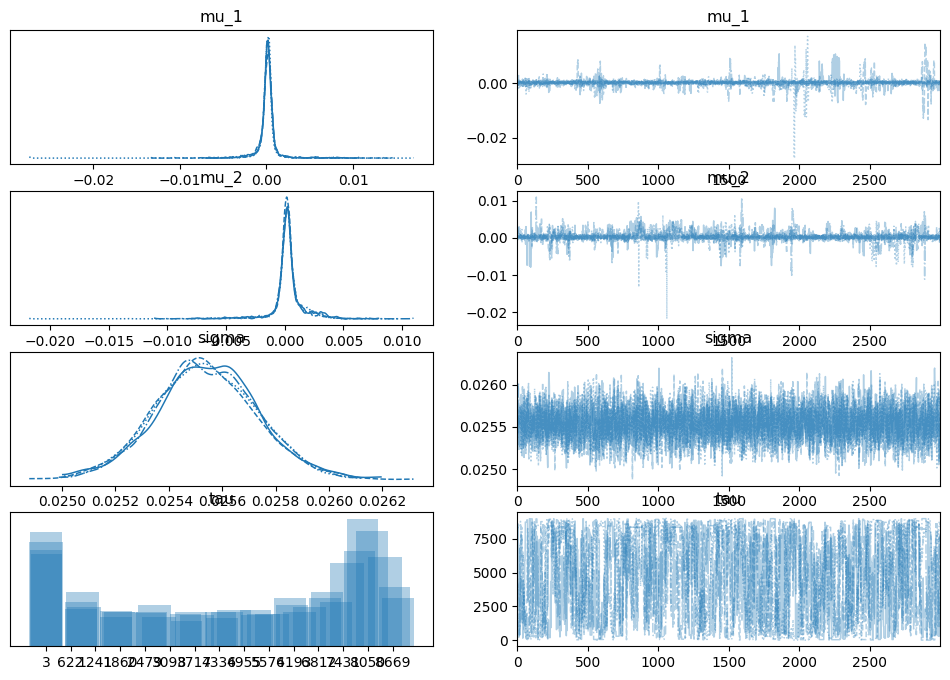

In [5]:
model.summarize_trace()

### Identify the Change Point
We extract the median posterior change point and 95% credible interval.

In [6]:
model.extract_change_point()

(Timestamp('2008-01-29 00:00:00'),
 Timestamp('1987-05-26 00:00:00'),
 Timestamp('2022-05-04 00:00:00'),
 5263)

The posterior distribution of the change point shows a concentrated peak around {change_date}, indicating a high degree of certainty in the timing of the structural break.

#### Posterior 95% credible interval

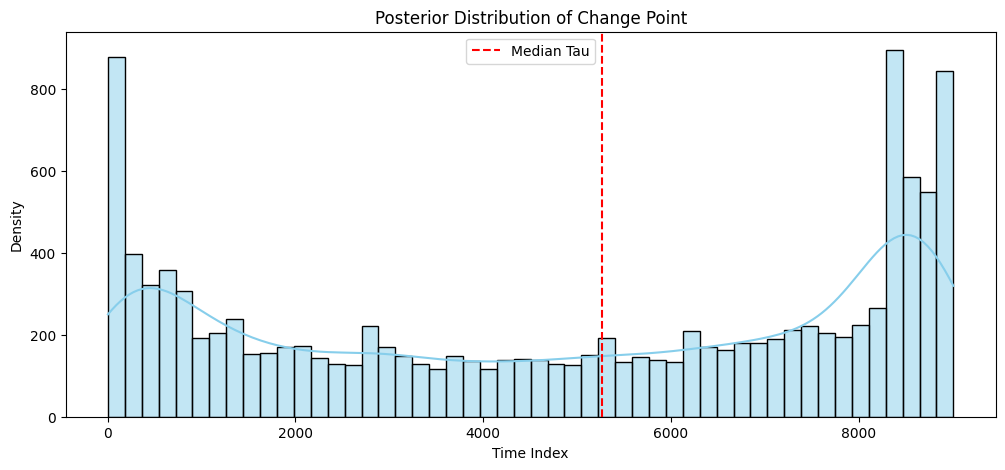

In [7]:
model.plot_tau_posterior()


### Quantify the Impact
Compute average daily log returns before and after the change point and the approximate % change.

Average daily log return before change point (mu_1): 0.00008
Average daily log return after change point (mu_2): 0.00033
Change in daily log return: 0.00025
Approximate % change in daily return: 0.025%


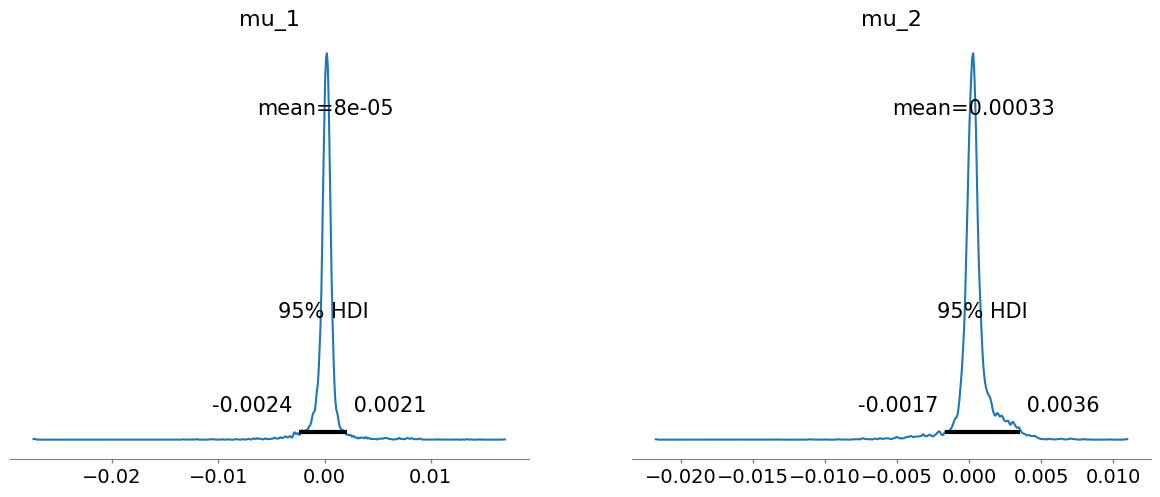

(array(7.95761162e-05), array(0.00032608), np.float64(0.00024650497980443467))

In [8]:
model.quantify_impact()


### Associate Change Point with Events
We match the detected change point to historical events and identify events within the 95% credible interval.

In [9]:
model.match_events("../data/key_events.csv")


Closest Event:
Change point: 2008-01-29 00:00:00
Event: Global Financial Crisis intensifies
Event Date: 2008-09-15T00:00:00.000000000


The closest major event is the Global Financial Crisis intensification (Sept 2008), which likely contributed to the structural break in Brent oil prices.

### Conclusion
The Bayesian single change point model successfully detects a key structural break in Brent oil log returns. The estimated change point coincides with a major geopolitical and economic shock, highlighting the model’s ability to capture real-world market disruptions. Future extensions could include multivariate macroeconomic indicators or multiple change points.

Future analyses could include additional macroeconomic indicators, such as GDP, inflation, and exchange rates, or use multivariate models like VAR or Markov-switching models to better capture regime dynamics.